In [ ]:
pip install mapclassify>=2.4.0

In [ ]:
pip install pillow

In [ ]:
import pandas as pd
import geopandas as gpd
import mapclassify
import PIL
import io

In [ ]:
# Reading in the csv data
data = pd.read_csv(r"D:\JP CERTIFICATES\IITK\Course summerterm\AArcGIS project\python_integration\Dynamic mapping\COVID-19-master\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv")

In [ ]:
# Group the data by the country 
data = data.groupby('Country/Region').sum()

In [ ]:
# Drop Lat and Lon columns
data = data.drop(columns = ['Lat', 'Long'])

In [ ]:
#Create a transpose of the dataframe 
data_transposed  = data.T
##data_transposed.plot(y = ['Australia', 'China', 'US', 'Italy'], use_index = True, figsize = (8,8), marker = '*')

In [ ]:
# Read in the world map shapefile 
world = gpd.read_file(r"D:\JP CERTIFICATES\IITK\Course summerterm\AArcGIS project\python_integration\Dynamic mapping\World_Map.shp")

world.replace('Viet Nam', 'Vietnam', inplace = True)
world.replace('Brunei Darussalam', 'Brunei', inplace = True)
world.replace('Cape Verde', 'Cabo Verde', inplace = True)
world.replace('Democratic Republic of the Congo', 'Congo (Kinshasa)', inplace = True)
world.replace('Congo', 'Congo (Brazzaville)', inplace = True)
world.replace('Czech Republic', 'Czechia', inplace = True)
world.replace('Swaziland', 'Eswatini', inplace = True)
world.replace('Iran (Islamic Republic of)', 'Iran', inplace = True)
world.replace('Korea, Republic of', 'Korea, South', inplace = True)
world.replace("Lao People's Democratic Republic", 'Laos', inplace = True)
world.replace('Libyan Arab Jamahiriya', 'Libya', inplace = True)
world.replace('Republic of Moldova', 'Moldova', inplace = True)
world.replace('The former Yugoslav Republic of Macedonia', 'North Macedonia', inplace = True)
world.replace('Syrian Arab Republic', 'Syria', inplace = True)
world.replace('Taiwan', 'Taiwan*', inplace = True)
world.replace('United Republic of Tanzania', 'Tanzania', inplace = True)
world.replace('United States', 'US', inplace = True)
world.replace('Palestine', 'West Bank and Gaza', inplace = True)

print(merge.head())

In [20]:
# Merging the 'data' with 'world' geopandas geodataframe
merge = world.join(data, on = 'NAME', how = 'right')

print(merge.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 185 entries, 30.0 to 222.0
Data columns (total 88 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   NAME            185 non-null    object  
 1   geometry        180 non-null    geometry
 2   Province/State  185 non-null    object  
 3   1/22/20         185 non-null    int64   
 4   1/23/20         185 non-null    int64   
 5   1/24/20         185 non-null    int64   
 6   1/25/20         185 non-null    int64   
 7   1/26/20         185 non-null    int64   
 8   1/27/20         185 non-null    int64   
 9   1/28/20         185 non-null    int64   
 10  1/29/20         185 non-null    int64   
 11  1/30/20         185 non-null    int64   
 12  1/31/20         185 non-null    int64   
 13  2/1/20          185 non-null    int64   
 14  2/2/20          185 non-null    int64   
 15  2/3/20          185 non-null    int64   
 16  2/4/20          185 non-null    int64   
 17  2/5/20  

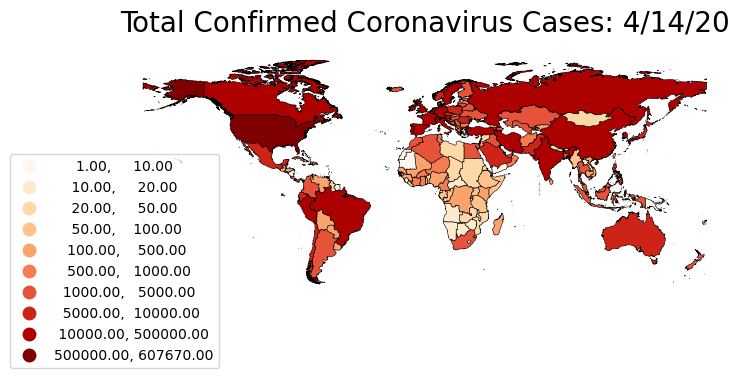

In [23]:
ax = merge.plot(column = dates, 
                cmap = 'OrRd', 
                figsize = (8,8), 
                legend = True,
                scheme = 'user_defined', 
                classification_kwds = {'bins':[10, 20, 50, 100, 500, 1000, 5000, 10000, 500000]}, 
                edgecolor = 'black',
                linewidth = 0.4)
    
# Add a title to the map 
ax.set_title('Total Confirmed Coronavirus Cases: '+ dates, fontdict = 
             {'fontsize':20}, pad = 12.5)
    
# Removing the axes
ax.set_axis_off()
    
# Move the legend 
ax.get_legend().set_bbox_to_anchor((0.18, 0.6))
    
img = ax.get_figure()
    
    
f = io.BytesIO()
img.savefig(f, format = 'png', bbox_inches = 'tight')
f.seek(0)
image_frames.append(PIL.Image.open(f))